In [73]:
import pandas as pd
import matplotlib.pyplot as plt

MODEL_NAME = 'vit_b_16'
data = pd.read_csv(f'./results/train/{MODEL_NAME}.csv')

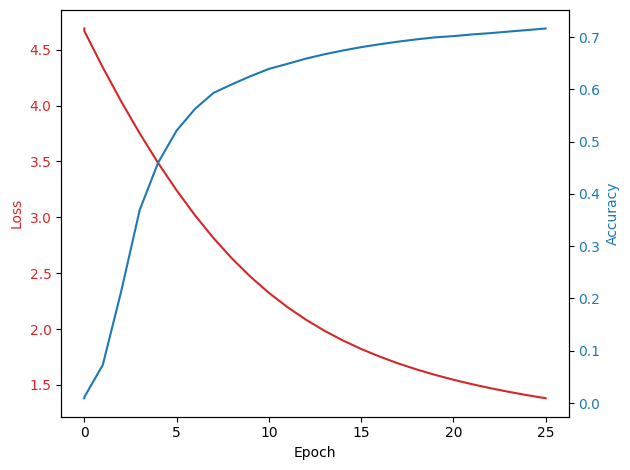

In [74]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(data['epoch'], data['loss'], color='tab:red', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(data['epoch'], data['accuracy'], color='tab:blue', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.show()

In [75]:
import checkpoint
import models

model, preprocess = models.transformer()
loaded, model, _ = checkpoint.load(model, MODEL_NAME)

-> loading from disk


In [76]:
import data
_, test_loader = data.cifar100(preprocess, batch_size=10, device="mps")

Files already downloaded and verified
Files already downloaded and verified


In [77]:
import pandas as np
import torch
import pickle
import torchvision

def denormalize(tensor):
    imagenet_mean = torch.tensor([0.485, 0.456, 0.406], device=tensor.device)
    imagenet_std = torch.tensor([0.229, 0.224, 0.225], device=tensor.device)
    resize = torchvision.transforms.Resize((32, 32))
    tensor = resize(tensor)
    
    tensor = tensor.permute(1, 2, 0)  # Change shape from (C, H, W) to (H, W, C)
    tensor = tensor * imagenet_std + imagenet_mean
    tensor = tensor.clamp(0, 1)
    return tensor

meta_file_path = './data/cifar-100-python/meta'
with open(meta_file_path, 'rb') as f:
    meta = pickle.load(f)

CLASS_LABELS = meta['fine_label_names']

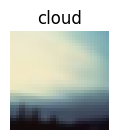

sea: 0.489488
cloud: 0.187505
mountain: 0.106863
plain: 0.059191
pine_tree: 0.018311


In [78]:
import torch.nn.functional as F

i = 8

(images, labels) = next(iter(test_loader))
predictions = model(images)

img = images[i]
label = labels[i]
prediction = predictions[i]

softmax_predictions = F.softmax(prediction, dim=0)
top5_prob, top5_catid = torch.topk(softmax_predictions, 5)

plt.figure(figsize=(1.28, 1.28), dpi=100)
plt.imshow(denormalize(img))
plt.title(CLASS_LABELS[labels[i]])
plt.axis('off')
plt.show()

for idx in range(top5_prob.size(0)):
    print(f"{CLASS_LABELS[top5_catid[idx]]}: {top5_prob[idx].item():.6f}")